In [1]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages')

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root_path = '/data/data_2021_08_18/raw/sim_2/'
image_files = os.listdir(root_path)
collision_index = np.load('/data/data_2021_08_18/raw/label/label_2.npy')
print("The number of images:{}".format(len(image_files)))
print('The length of the collision index is:{}'.format(len(collision_index)))

The number of images:17765
The length of the collision index is:500


In [3]:
# compute the time to collision
temp_len_images = []
num_frames = 6
for i in range(1,498): 
    temp_n = collision_index[i+1] - collision_index[i]
    temp_len_images.append(int(temp_n))    

print(temp_len_images)

[66, 14, 50, 9, 44, 9, 16, 12, 32, 11, 0, 6, 8, 9, 19, 32, 34, 101, 23, 45, 7, 9, 16, 153, 87, 62, 75, 16, 15, 17, 24, 16, 30, 17, 75, 52, 91, 5, 55, 12, 63, 43, 43, 12, 12, 11, 7, 17, 14, 29, 28, 24, 32, 18, 4, 12, 16, 39, 24, 8, 23, 18, 28, 74, 11, 12, 12, 15, 188, 12, 0, 31, 162, 64, 7, 12, 44, 7, 15, 17, 21, 11, 43, 5, 72, 13, 33, 12, 24, 9, 81, 32, 13, 6, 9, 0, 102, 16, 9, 68, 17, 11, 67, 19, 2, 25, 39, 51, 23, 19, 7, 14, 18, 13, 33, 50, 0, 10, 13, 13, 27, 9, 116, 49, 29, 12, 30, 38, 13, 16, 20, 15, 100, 18, 0, 28, 37, 11, 33, 19, 89, 37, 19, 16, 98, 13, 67, 0, 194, 86, 7, 3, 47, 40, 137, 9, 1, 99, 104, 2, 18, 5, 8, 18, 63, 8, 22, 20, 60, 50, 96, 26, 44, 11, 8, 16, 8, 13, 2, 90, 6, 12, 19, 11, 10, 207, 37, 10, 11, 21, 23, 20, 36, 20, 15, 23, 10, 8, 8, 9, 58, 11, 17, 63, 20, 24, 53, 0, 11, 144, 7, 4, 16, 18, 9, 81, 14, 16, 24, 4, 77, 8, 185, 52, 7, 21, 0, 16, 21, 20, 3, 0, 22, 93, 24, 6, 12, 6, 13, 91, 415, 3, 113, 65, 70, 43, 21, 22, 7, 82, 21, 405, 0, 47, 2, 34, 37, 48, 0, 195, 2

In [5]:
def cal_time_to_coll(image_index, num_images, num_frames):
    # load images from the dataroot directory
    # divide the image in the form of [num_samples, num_frames, image_size]
    image_buffer = []
    t2c_buffer = []    
    _image_buffer = []    
    
    if num_images <= 6:
        image_buffer = None
        t2c_buffer = None
    
    else:        
        for i in range(num_images):
#             temp_image = cv2.imread('/data/data_2021_08_18/raw/gan/model_V2/gan_2/' + str(i + image_index) + '_B_fake.png')            
            temp_image = cv2.imread('/data/data_2021_08_18/raw/sim_2/' + str(i + image_index) + '_B.png')            
            temp_image = cv2.resize(temp_image, (128,128), interpolation = cv2.INTER_AREA)
            _image_buffer.append(temp_image)        
            
        for j in range(num_images - num_frames):
            image_buffer.append(_image_buffer[j:j + num_frames]) 
            temp_time = num_images * 0.2 - 1.2 - j*0.2 - 0.2 
            temp_time = abs(np.round(temp_time, 2))
            if temp_time >= 6:
                temp_time = 6.0
            else:
                temp_time = temp_time
            t2c_buffer.append(temp_time)        
    return image_buffer, t2c_buffer

In [6]:
image_index = collision_index[1]
buffer = []
label = []
for i in range(497):    
    [temp_image_buffer, temp_t2c_buffer] = cal_time_to_coll(image_index, temp_len_images[i], num_frames=6)
    image_index = image_index + temp_len_images[i]    
    if temp_image_buffer is None:
        pass
    else:
        buffer.append(temp_image_buffer)
        label.append(temp_t2c_buffer)
print("size of buffer:{}".format(np.shape(buffer)))  
print("size of label:{}".format(np.shape(label)))

size of buffer:(428,)
size of label:(428,)


2
True time to collision: 0.2
Shape of the data:(6, 128, 128, 3)


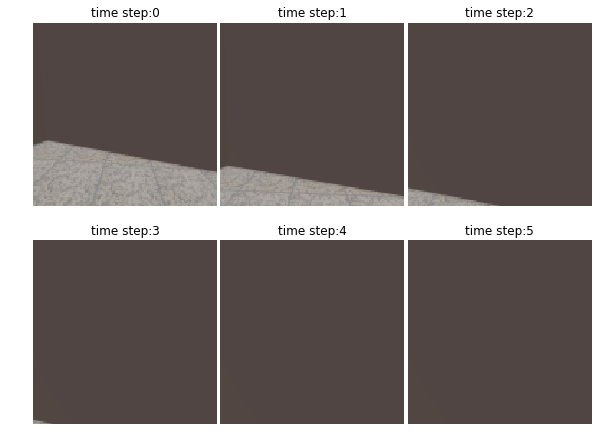

In [7]:
# check the shape of buffer and label
episode_index = np.random.randint(0,len(label))
sample_image = buffer[episode_index]
sample_label = label[episode_index]

print(len(sample_image))

# check the image and label whether they are paired correctly
frame_index = np.random.randint(len(sample_image))
print("True time to collision: {}".format(sample_label[frame_index]))

sample = sample_image[frame_index]
print("Shape of the data:{}".format(np.shape(sample)))
fig = plt.figure(figsize = (10,8))
for i in range(6):
    _sample = np.reshape(sample[i],[128, 128,3]) / 255.
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(_sample)
    ax.set_title('time step:' + str(i))
    ax.axis("off")

plt.subplots_adjust(wspace=0.02, hspace=0)
plt.show()

# fig.savefig('sample_input.png', dpi = 600, bbox_inches = 'tight')

In [8]:
# count total sequence of frames
frame_count = 0
for index, frames in enumerate(buffer):
    frame_count +=len(frames)
print("Total number of sequences:{}".format(frame_count))

Total number of sequences:14908


In [9]:
train_x = np.zeros([frame_count, 6, 128, 128, 3])
train_y = np.zeros([frame_count])

index = 0
for frames, t2c in zip(buffer, label):
    train_x[index:index + len(frames)] = frames
    train_y[index:index + len(frames)] = t2c
    index +=len(frames)

In [10]:
# shuffle_data
rand_index = np.random.permutation(len(train_x))
train_x = train_x[rand_index] / 255.
train_y = train_y[rand_index]

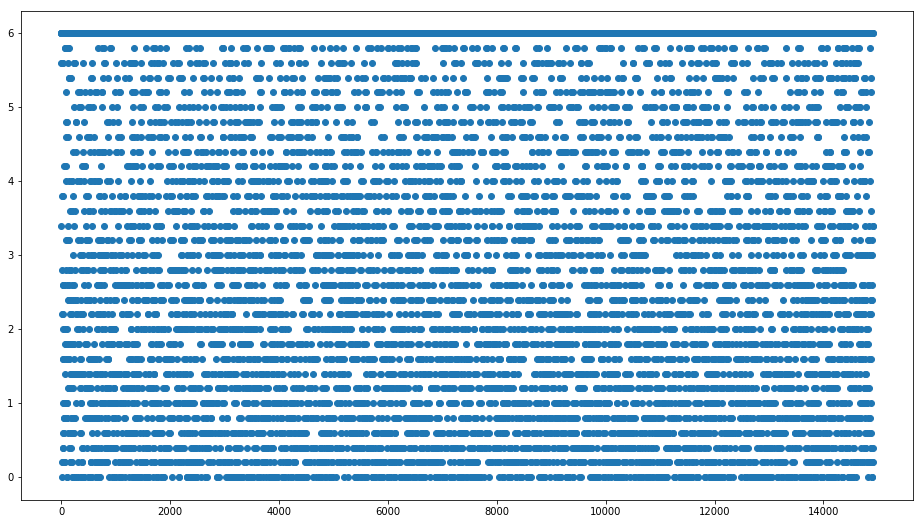

In [11]:
n = np.arange(len(train_y))
plt.figure(figsize = (16,9))
plt.scatter(n, train_y[n])
# plt.ylim([0, 0.2])
plt.show()

In [12]:
# check the size of total dataset
print("size of train_x:{}".format(np.shape(train_x)))
print("size of train_y:{}".format(np.shape(train_y)))

size of train_x:(14908, 6, 128, 128, 3)
size of train_y:(14908,)


True time to collision: 3.0
Shape of the data:(6, 128, 128, 3)


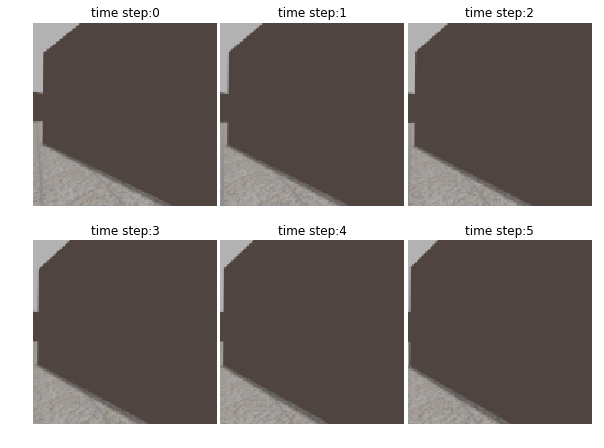

In [13]:
# check the image and label whether they are paired correctly
frame_index = np.random.randint(len(train_x))
print("True time to collision: {}".format(train_y[frame_index]))

sample = train_x[frame_index]
print("Shape of the data:{}".format(np.shape(sample)))
fig = plt.figure(figsize = (10,8))
for i in range(6):
    _sample = np.reshape(sample[i],[128, 128,3])
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(_sample)
    ax.set_title('time step:' + str(i))
    ax.axis("off")

plt.subplots_adjust(wspace=0.02, hspace=0)
plt.show()

# fig.savefig('sample_input.png', dpi = 600, bbox_inches = 'tight')

In [14]:
np.save('/data/data_2021_08_18/preprocessed/SIM_CONVLSTM_DATA/train_image_ConvLSTM_2021_08_18_2.npy', train_x)
np.save('/data/data_2021_08_18/preprocessed/SIM_CONVLSTM_DATA/train_label_ConvLSTM_2021_08_18_2.npy', train_y)